# Importing Libraries
Imageio is used for reading the images. The functions are implemented from scratch.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from imageio import imread

# Window Size
We choose the window size to be the smallest odd integer greater than or equal to $6\sigma$

In [2]:
def window_size(sigma):
    # choose the window size to be the
    # smallest odd integer greater than
    # or equal to 6*sigma
    w = np.ceil(6*sigma)
    if w % 2 == 0:
        w += 1
    return int(w)

# Zero Pad the Image
We zero pad the image on each side with zeroes of thickness $\lfloor\frac{w}{2}\rfloor$ so that the filtered image is of the same size as the original image. $w$ here is the window size of the kernel, which is chosen to be the smallest odd integer greater than or equal to $6\sigma$

In [3]:
def zero_pad_image(image, w):
    # get the shape of the image
    [x, y] = np.shape(image)
    # how much to zero pad by to maintain the shape
    d = w//2
    # array of zeros
    zero_padded_image = np.zeros((x+2*d, y+2*d))
    # fill the middle of it with the given image
    zero_padded_image[d:-d, d:-d] = image
    return zero_padded_image

# Window Size
We construct a Gaussian kernel of the required size when the standard deviation of the kernel, $\sigma$ is provided. If the window size is $w$, we define $d$ as $d=\lfloor\frac{w}{2}\rfloor$. Then the Gaussian Kernel $G$ is defined as 
$$
G(i, j) = \frac{1}{2\pi\sigma^{2}}e^{\frac{-i^{2}-j^{2}}{2\sigma^{2}}}
$$
However, the entries of $G$ might not sum up to 1. We normalise $G$ and define the modified Gaussian Kernel as
$$
\bar{G}(i, j) = \frac{1}{2\pi\sigma^{2}S}e^{\frac{-i^{2}-j^{2}}{2\sigma^{2}}}
$$
Where $S$ is defined as
$$
S = \Sigma_{i, i=-d}^{i, j=d}G(i,j)
$$
This ensures that the entries of the Gaussian Kernel sum up to 1. We do this to ensure that while blurring an image, we do not amplify or dim it.

In [4]:
def gaussian_kernel(sigma):
    # window size for the given sigma
    w = window_size(sigma)
    d = w//2
    # blur kernel of the required size
    blur_kernel = np.zeros((w, w))
    if w == 1:
        # to prevent division by zero errors when the sigma value is zero
        # when sigma is zero, the Gaussian kernel is essentially [[1]]
        return np.ones((w, w))
    for i in range(w):
        for j in range(w):
            # As defined in class
            # skipping the 1/(2*np.pi*sigma**2) constant as it will cancel
            # out anyways in the sum and calculating it again and again is
            # just useless computation
            blur_kernel[i, j] = np.exp((-(i-d)**2-(j-d)**2)/(2*(sigma**2)))
    # divide by the sum of the entries so that the entries of the kernel
    # sum up to 1. This is necessary to ensure that we do not dim or brighten
    # the image we are convolving
    blur_kernel = blur_kernel/np.sum(blur_kernel)
    return blur_kernel

# 2D Convolution
In this section we take an image and a given $\sigma$. Using the $\sigma$, we form the required Gaussian Kernel and convolve it with the given image. We perform 2D convolution by sliding the kernel over the image. Note that the image is zero padded before convolution to ensure that the output image is of the same size as the input image.

In [5]:
def convolution_2D(image, sigma, correlation=True):
    # The correlation parameter is to distinguish between
    # correlation and convolution. For a Gaussian kernel, it
    # makes no difference as the symmetry of the Gaussian kernel means
    # correlation and convolution give the same results

    # get the shape of the image
    [x, y] = np.shape(image)
    w = window_size(sigma)
    d = w//2
    # if the kernel is of size (1,1), just return the original image
    if d == 0:
        return image
    # get the zero padded image
    padded_image = zero_pad_image(image, w)
    # get the Gaussian kernel
    blur_kernel = gaussian_kernel(sigma)
    if not correlation:
        # flip the kernel if we are going to perform convolution
        blur_kernel = blur_kernel[::-1, ::-1]
    filtered_image = np.zeros((x, y))
    for i in range(d, x+d):
        for j in range(d, y+d):
            # Extract the required image patch, multiply it with the kernel,
            # sum up the values and store it in the filtered_image array
            patch = padded_image[i-d:i+d+1, j-d:j+d+1]
            filtered_image[i-d, j-d] = np.sum(blur_kernel*patch)
    return filtered_image

# Reading the Image
Reading the image present. It is assumed that the image is present in the same directory as the notebook. We also define the $\sigma$ values mentioned in the assignment PDF.

In [6]:
img = imread('Mandrill.png')
# flip the sigmas array so that we go from lowest blur to highest blur
sigmas = [1.6, 1.2, 1.0, 0.6, 0.3, 0.0][::-1]

# Storing Results
We perform 2D convolution and save the filtered images in a dictionary for easy access later.

In [7]:
filtered_images_dict = dict()
for n in range(len(sigmas)):
    filtered_images_dict[n] = convolution_2D(img, sigmas[n])

# Results
We visualize the filtered images for different values of $\sigma$.

## Original Image
Visualization of the original image.

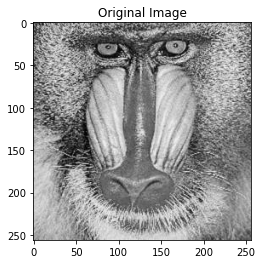

In [8]:
plt.imshow(img, 'gray')
plt.title("Original Image")
plt.show()

## Blurred Images
Resulting images after blurring with Gaussians kernel for various sigma values

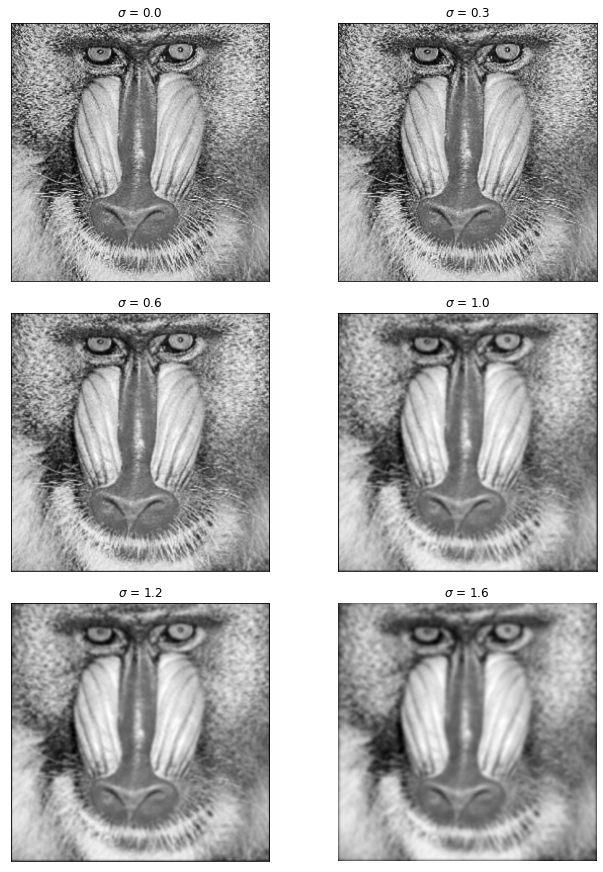

In [9]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(9,12), constrained_layout=True)
ax1.set_xticks([])
ax1.set_yticks([])
ax2.set_xticks([])
ax2.set_yticks([])
ax3.set_xticks([])
ax3.set_yticks([])
ax4.set_xticks([])
ax4.set_yticks([])
ax5.set_xticks([])
ax5.set_yticks([])
ax6.set_xticks([])
ax6.set_yticks([])
ax1.imshow(filtered_images_dict[0], 'gray')
ax1.title.set_text(rf"$\sigma$ = {sigmas[0]}")
ax2.imshow(filtered_images_dict[1], 'gray')
ax2.title.set_text(rf"$\sigma$ = {sigmas[1]}")
ax3.imshow(filtered_images_dict[2], 'gray')
ax3.title.set_text(rf"$\sigma$ = {sigmas[2]}")
ax4.imshow(filtered_images_dict[3], 'gray')
ax4.title.set_text(rf"$\sigma$ = {sigmas[3]}")
ax5.imshow(filtered_images_dict[4], 'gray')
ax5.title.set_text(rf"$\sigma$ = {sigmas[4]}")
ax6.imshow(filtered_images_dict[5], 'gray')
ax6.title.set_text(rf"$\sigma$ = {sigmas[5]}")
plt.axis('off')
plt.show()

## Observations
The following observations can be made.
- As we increase $\sigma$, the resulting images get gradually more blurred
- For a Gaussian Kernal, taking convolution or correlation with an image gives the same result
- For $\sigma=0$, we have no blur as expected
- Gaussian blur is essentially a low pass filtering operation. As the $\sigma$ is increased, the high frequency content (edges) get reduced more and more
- It is used in denoising images. That comes at the cost of losing edge information, however
